In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('data.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
print(data.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

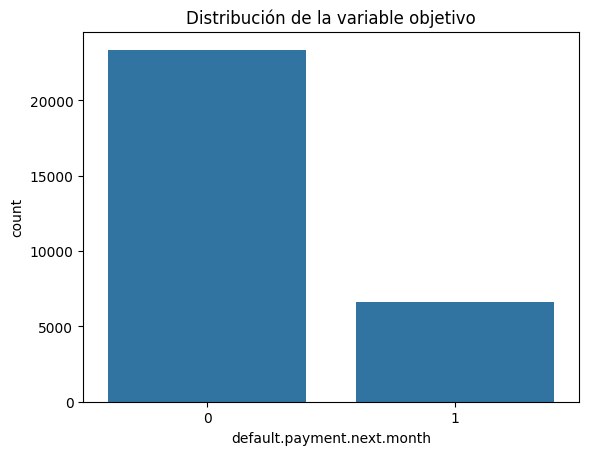

In [6]:
sns.countplot(x='default.payment.next.month', data=data)
plt.title('Distribución de la variable objetivo')
plt.show()

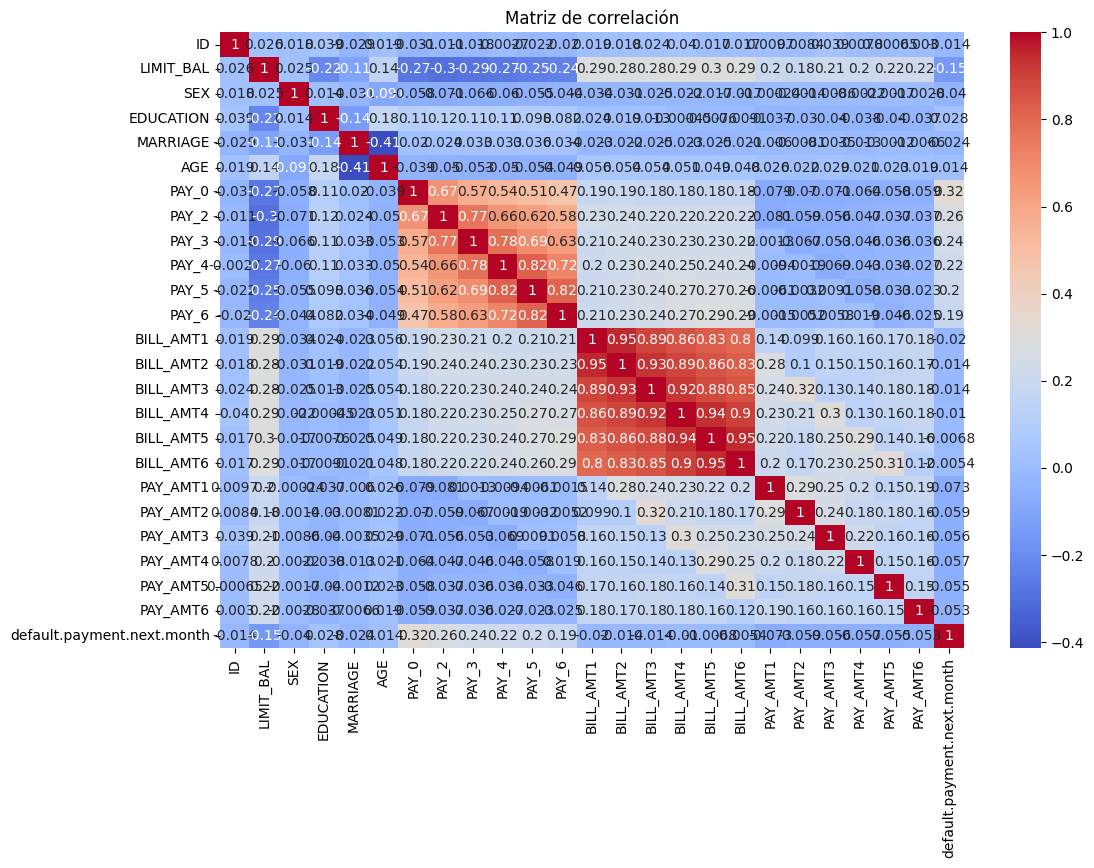

In [8]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [9]:
data_clean = data.dropna()

In [10]:
X = data_clean.drop(columns=['ID', 'default.payment.next.month'])
y = data_clean['default.payment.next.month']

In [29]:
#Escalar los datos
scaler = StandardScaler()
data_escalada = scaler.fit_transform(data)
data_escalada[:5]

array([[-1.73199307, -1.13672015,  0.81016074,  0.18582826, -1.05729503,
        -1.24601985,  1.79456386,  1.78234817, -0.69666346, -0.66659873,
        -1.53004603, -1.48604076, -0.64250107, -0.64739923, -0.66799331,
        -0.67249727, -0.66305853, -0.65272422, -0.34194162, -0.22708564,
        -0.29680127, -0.30806256, -0.31413612, -0.29338206,  1.87637834],
       [-1.7318776 , -0.3659805 ,  0.81016074,  0.18582826,  0.85855728,
        -1.02904717, -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,
         0.23491652,  1.99231551, -0.65921875, -0.66674657, -0.63925429,
        -0.62163594, -0.60622927, -0.59796638, -0.34194162, -0.21358766,
        -0.24000461, -0.24422965, -0.31413612, -0.18087821,  1.87637834],
       [-1.73176213, -0.59720239,  0.81016074,  0.18582826,  0.85855728,
        -0.16115646,  0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,
         0.23491652,  0.25313738, -0.29855966, -0.49389911, -0.48240819,
        -0.44973025, -0.41718767, -0.39162956, -0

In [51]:
# Entrenamiento del modelo PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred))

[[4580  107]
 [1108  205]]


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4687
           1       0.66      0.16      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.73      0.57      0.57      6000
weighted avg       0.77      0.80      0.74      6000



In [69]:
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.7975
